In [1]:
#import Biopython
import Bio as Bio

In [2]:
#import our three important packages
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

In [3]:
#import the sequences we will use. These are 16s sequences from GenBank
#example: https://www.ncbi.nlm.nih.gov/nuccore/FJ039971.1?report=genbank 
t1 = SeqIO.read("sequence1.fasta", "fasta")
t2 = SeqIO.read("sequence2.fasta", "fasta")
t3 = SeqIO.read("sequence3.fasta", "fasta")
t4 = SeqIO.read("sequence4.fasta", "fasta")
t5 = SeqIO.read("sequence5.fasta", "fasta")
t6 = SeqIO.read("sequence6.fasta", "fasta")
t7 = SeqIO.read("sequence7.fasta", "fasta")
t8 = SeqIO.read("sequence8.fasta", "fasta")

In [4]:
#rename each of the sequences 
#this step is not required, it will just make the tree easier to understand 
print(t1.description)
t1.id = '05'
t2.id = '06'
t3.id = '07'
t4.id = '08'
t5.id = '09'
t6.id = '10'
t7.id = '11'
t8.id = '12'

KT388705.1 Influenza A virus (A/goose/Taiwan/TNO20/2015(H5N8)) segment 1 cRNA sequence


In [5]:
# Combine all of the individual sequences into a new file 
turtles = SeqIO.write([t1,t2,t3,t4,t5,t6,t7], "Taiwan_Goose.fasta", "fasta")

In [6]:
# Open the alignment file as a MultipleSeqAlignment object 
with open("Taiwan_Goose.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
print(type(alignment))

<class 'Bio.Align.MultipleSeqAlignment'>


In [7]:
# Open and initiate the Distance Calculator using the Identity model 
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')

In [8]:
# Write the Distance Matrix 
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)

07	0
10	0.6125525946704067	0
08	0.6570827489481066	0.5767882187938289	0
06	0.6746143057503506	0.6539270687237027	0.6090462833099579	0
11	0.6332398316970547	0.44740532959326784	0.5094670406732118	0.6633941093969145	0
05	0.6574333800841514	0.6318373071528751	0.6476157082748948	0.6009817671809257	0.6756661991584852	0
09	0.6023842917251052	0.4828190743338009	0.5213884992987377	0.5988779803646564	0.43127629733520334	0.5631136044880786	0
	07	10	08	06	11	05	09


In [9]:
# Open and initiate the Tree Constructor 
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)

In [10]:
Goose_tree = constructor.build_tree(alignment)
Goose_tree.rooted = True
print(Goose_tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner5')
        Clade(branch_length=0.02406206171107997, name='Inner3')
            Clade(branch_length=0.27749532491818607, name='08')
            Clade(branch_length=0.03219962599345488, name='Inner2')
                Clade(branch_length=0.034580995792426406, name='Inner1')
                    Clade(branch_length=0.29807152875175313, name='05')
                    Clade(branch_length=0.30291023842917253, name='06')
                Clade(branch_length=0.3309519635343618, name='07')
        Clade(branch_length=0.022221248246844377, name='Inner4')
            Clade(branch_length=0.20536027349228614, name='11')
            Clade(branch_length=0.2420450561009817, name='10')
        Clade(branch_length=0.21112377279102382, name='09')


In [11]:
# Save the tree to a new file 
Phylo.write(Goose_tree, "Goose_tree.xml", "phyloxml")

1

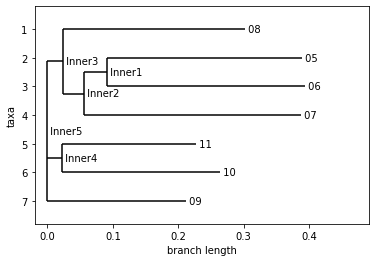

In [12]:
# Import matplotlib and create a basic tree 
import matplotlib
import matplotlib.pyplot as plt
fig = Phylo.draw(Goose_tree)

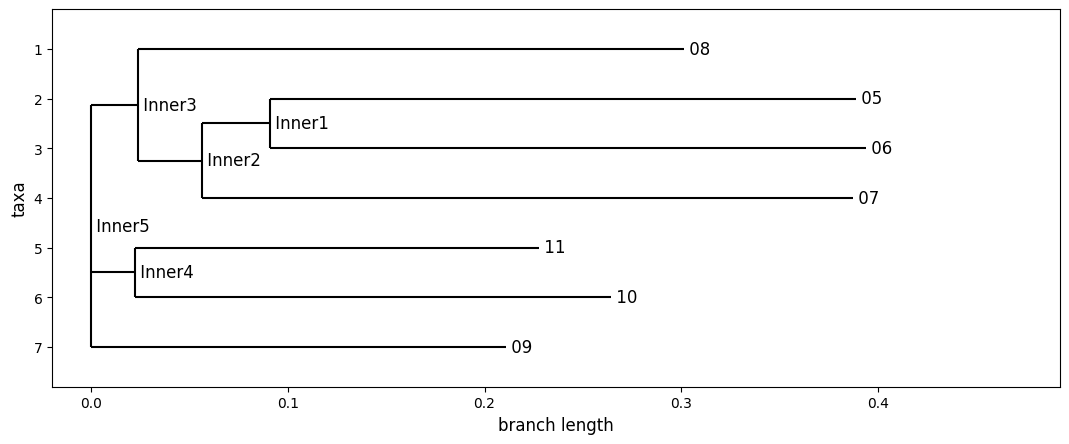

In [13]:
# Make a better looking tree using the features of matplotlib 

fig = plt.figure(figsize=(13, 5), dpi=100) # create figure & set the size 
matplotlib.rc('font', size=12)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels
#Goose_tree.ladderize()
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(Goose_tree, axes=axes)
fig.savefig("Goose_cladogram")

In [14]:
constructor = DistanceTreeConstructor()
tree = constructor.upgma(distance_matrix)

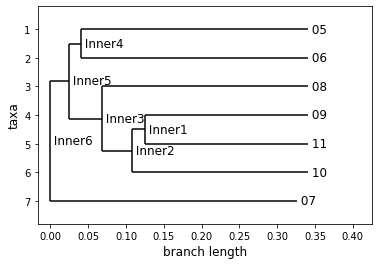


Phylogenetic Tree
          _________________________________________________________________ 05
       __|
      |  |_________________________________________________________________ 06
  ____|
 |    |         ___________________________________________________________ 08
 |    |        |
 |    |________|             ______________________________________________ 09
_|             |         ___|
 |             |________|   |______________________________________________ 11
 |                      |
 |                      |__________________________________________________ 10
 |
 |_____________________________________________________________________ 07



In [15]:
# Draw the phylogenetic tree
Phylo.draw(tree)

# Print the phylogenetic tree in the terminal
print('\nPhylogenetic Tree\n===================')
Phylo.draw_ascii(tree)

In [16]:
constructor = DistanceTreeConstructor()
tree = constructor.nj(distance_matrix)

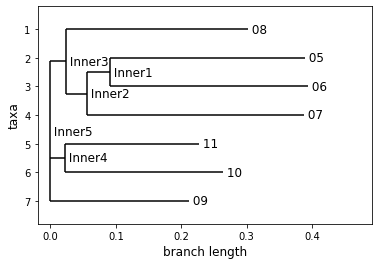

In [17]:
# Draw the phylogenetic tree
Phylo.draw(tree)

# Print the phylogenetic tree in the terminal
#print('\nPhylogenetic Tree\n===================')
#Phylo.draw_ascii(tree)